In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [64]:
df = pd.read_csv("/content/term-deposit-marketing-2020.csv")
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'y'],
      dtype='object')

In [3]:
df.isna().sum().sum()

0

In [4]:
df.shape

(40000, 14)

In [5]:
df.dtypes

age           int64
job          object
marital      object
education    object
default      object
balance       int64
housing      object
loan         object
contact      object
day           int64
month        object
duration      int64
campaign      int64
y            object
dtype: object

In [65]:
target = {'yes':1, 'no':0}
df.y.replace(target, inplace=True)

In [7]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,0
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,0
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,0
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,0
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,0


# Exploratory Data Analysis

In [8]:
df.y.value_counts() #imbalanced data

0    37104
1     2896
Name: y, dtype: int64

Text(0.5, 1.0, 'Age Dist of Not Subscribed')

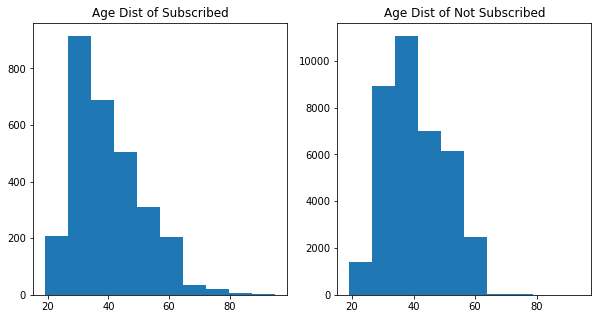

In [9]:
#Age
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(10,5))
ax1.hist(df[df.y == 1].age)
ax1.set_title("Age Dist of Subscribed")
ax2.hist(df[df.y == 0].age)
ax2.set_title("Age Dist of Not Subscribed")

In [10]:
df[['age','y']].groupby('y').mean()

,age
y,
0,40.599208
1,39.844959


In [11]:
#Age and marital status
df[['age','marital','y']].groupby(['y','marital']).mean()

age
y marital            
0 divorced  44.729811
  married   42.555352
  single    34.240114
1 divorced  45.723785
  married   43.192152
  single    32.789679

In [12]:
#Job
df[['job','y']].groupby('job').agg(['mean','count','sum']).sort_values(by=('y','mean'), ascending=False)

y           
                   mean count  sum
job                               
student        0.156489   524   82
retired        0.105080  1437  151
unemployed     0.086957  1104   96
management     0.082782  8166  676
self-employed  0.079208  1414  112
admin          0.078296  4483  351
technician     0.072534  6852  497
unknown        0.072340   235   17
entrepreneur   0.062633  1405   88
services       0.060870  3910  238
blue-collar    0.057018  9383  535
housemaid      0.048758  1087   53

In [66]:
df.job.replace(['self-employed','admin','technician','unknown'], 'other', inplace=True)

In [15]:
#Marital
df[['marital','y']].groupby('marital').agg(['mean','count','sum'])

y             
              mean  count   sum
marital                        
divorced  0.082751   4725   391
married   0.060609  24386  1478
single    0.094315  10889  1027

In [16]:
#Education
df[['education','y']].groupby('education').agg(['mean','count','sum'])

y             
               mean  count   sum
education                       
primary    0.056300   6270   353
secondary  0.067546  20993  1418
tertiary   0.091826  11206  1029
unknown    0.062704   1531    96

In [51]:
df.education.replace(['unknown', 'primary', 'secondary'], 'other', inplace=True)

In [18]:
#Duration (very important)
df[['y','duration']].groupby('y').mean()

,duration
y,
0,221.408042
1,682.958564


In [19]:
df[df.duration > 1000].y.value_counts()

1    569
0    388
Name: y, dtype: int64

In [20]:
df[df.duration <= 1000].y.value_counts()

0    36716
1     2327
Name: y, dtype: int64

In [23]:
df.duration.max()

4918

Text(0.5, 1.0, 'Call duration of subscribed customers')

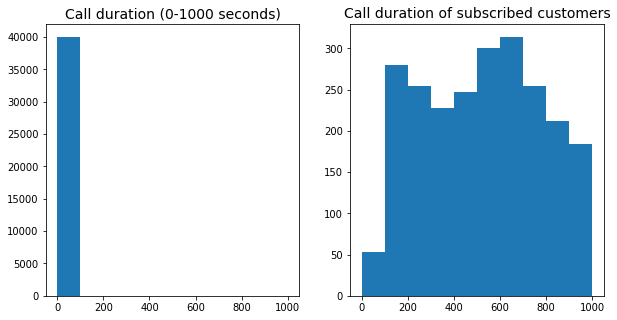

In [21]:
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(10,5))
ax1.hist(df.age, range=(0, 1000))
ax1.set_title("Call duration (0-1000 seconds)", fontsize=14)
ax2.hist(df[df.y == 1].duration, range=(0,1000))
ax2.set_title("Call duration of subscribed (0-1000)", fontsize=14)

In [25]:
#Default (may be excluded)
df[['default','y']].groupby('default').agg(['mean','count'])

y       
             mean  count
default                 
no       0.072644  39191
yes      0.060569    809

In [26]:
#Balance (important)
df[['y','balance']].groupby('y').mean()

,balance
y,
0,1249.752533
1,1588.495856


In [27]:
#Housing
df[['housing','y']].groupby('housing').agg(['mean','count'])

y       
             mean  count
housing                 
no       0.089674  15969
yes      0.060921  24031

In [28]:
#Loan
df[['loan','y']].groupby('loan').agg(['mean','count'])

y       
          mean  count
loan                 
no    0.076081  33070
yes   0.054834   6930

In [34]:
#Month
df[['month','y']].groupby('month').agg(['mean','count','sum']).sort_values(by=('y','mean'))

y            
           mean  count  sum
month                      
jan    0.032313   1176   38
aug    0.055225   5215  288
may    0.058454  13532  791
jul    0.060188   6380  384
nov    0.061145   3598  220
jun    0.062104   4734  294
dec    0.076923     13    1
feb    0.111063   2296  255
apr    0.165931   2718  451
mar    0.484496    258  125
oct    0.612500     80   49

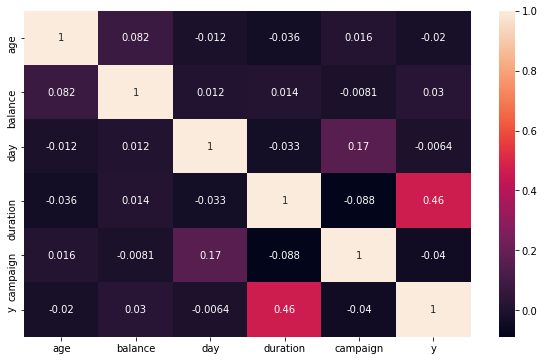

In [37]:
corr = df.corr()
plt.figure(figsize=(10,6))
sns.heatmap(corr, annot=True)

In [67]:
df = df.drop(['day','default','month'], axis=1)
df.head()

,age,job,marital,education,balance,housing,loan,contact,duration,campaign,y
0,58,management,married,tertiary,2143,yes,no,unknown,261,1,0
1,44,other,single,secondary,29,yes,no,unknown,151,1,0
2,33,entrepreneur,married,secondary,2,yes,yes,unknown,76,1,0
3,47,blue-collar,married,unknown,1506,yes,no,unknown,92,1,0
4,33,other,single,unknown,1,no,no,unknown,198,1,0


In [68]:
df = pd.get_dummies(df, drop_first=True)
df.head()

,age,balance,duration,campaign,y,job_entrepreneur,job_housemaid,job_management,job_other,job_retired,job_services,job_student,job_unemployed,marital_married,marital_single,education_secondary,education_tertiary,education_unknown,housing_yes,loan_yes,contact_telephone,contact_unknown
0,58,2143,261,1,0,0,0,1,0,0,0,0,0,1,0,0,1,0,1,0,0,1
1,44,29,151,1,0,0,0,0,1,0,0,0,0,0,1,1,0,0,1,0,0,1
2,33,2,76,1,0,1,0,0,0,0,0,0,0,1,0,1,0,0,1,1,0,1
3,47,1506,92,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,1,0,0,1
4,33,1,198,1,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,1


## Model

In [40]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

In [69]:
X = df.drop('y', axis=1)
y = df['y']

In [70]:
#train test split - logistic regression
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)
sc = MinMaxScaler().fit(X_train)
X_train = sc.transform(X_train)
X_test = sc.transform(X_test)
lr = LogisticRegression(class_weight={0:1, 1:3})
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)
print(accuracy_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

0.9325
[[8996  287]
 [ 388  329]]


In [72]:
#cross validation - logistic regression
lr2 = LogisticRegression(class_weight={0:1, 1:3})
clf = make_pipeline(MinMaxScaler(), lr2)
scores = cross_val_score(clf, X, y, cv=5, scoring='accuracy')
print(scores.mean())

0.923325


In [75]:
#cross validation - random forest
rf = RandomForestClassifier(n_estimators=150, max_depth=6, class_weight={0:1, 1:3})
scores2 = cross_val_score(rf, X, y, cv=5, scoring='accuracy')
print(scores2.mean())

0.9178000000000001


Logistic regression achieved 5-fold cross validation score of 92.3%. The average score turns out to be 91.8% with random forest. 

Since there is an imbalance between the classes in the target variable (y), I have adjusted the class weight so that the model does not focus too much on the dominant class.

Depending on the customer needs, the model can be trained to optimize different metric such as precision and recall. For instance, if customer demands to detect all of the positive classes (i.e. y=1), recall should be maximixed. 

# Bonus section

## What makes the customers buy?

In [76]:
rf = RandomForestClassifier(n_estimators=150, max_depth=6).fit(X_train, y_train)
rf.feature_importances_.round(3)

array([0.06 , 0.029, 0.804, 0.014, 0.001, 0.001, 0.002, 0.002, 0.002,
       0.002, 0.004, 0.001, 0.01 , 0.005, 0.003, 0.007, 0.003, 0.013,
       0.004, 0.002, 0.032])

In [80]:
df.head()

,age,balance,duration,campaign,y,job_entrepreneur,job_housemaid,job_management,job_other,job_retired,job_services,job_student,job_unemployed,marital_married,marital_single,education_secondary,education_tertiary,education_unknown,housing_yes,loan_yes,contact_telephone,contact_unknown
0,58,2143,261,1,0,0,0,1,0,0,0,0,0,1,0,0,1,0,1,0,0,1
1,44,29,151,1,0,0,0,0,1,0,0,0,0,0,1,1,0,0,1,0,0,1
2,33,2,76,1,0,1,0,0,0,0,0,0,0,1,0,1,0,0,1,1,0,1
3,47,1506,92,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,1,0,0,1
4,33,1,198,1,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,1


The most significant feature is "duration". The longer the call, the more likely that a customer subscribes. We also see that in the exploratory data analysis.



In [81]:
df[df.duration <= 200].y.value_counts()

0    22209
1      336
Name: y, dtype: int64

In [82]:
df[df.duration > 200].y.value_counts()

0    14895
1     2560
Name: y, dtype: int64

In [83]:
df[['duration','y']].groupby('y').mean()

,duration
y,
0,221.408042
1,682.958564


The averate duration of subscribed customers is 682 seconds whereas it is 221 seconds for customers who did not subscribe.

The calls that are longer than 200 seconds are much more likely to make a customer to subscribe than the calls shorter than 200 seconds.